Studi kasus Klasifikasi Gambar gunting, batu dan kertas pada permainan Paper, Scissor dan Rock.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Persiapan Direktori dan dataset**

In [2]:
import zipfile,os
local_zip = 'drive/MyDrive/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/MyDrive')
zip_ref.close()

base_dir = 'MyDrive/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

**Menentukan Direktori untuk data training dan data validation**

In [3]:
os.listdir('MyDrive/rockpaperscissors/train')


['rock', 'paper', 'scissors']

In [4]:
os.listdir('MyDrive/rockpaperscissors/val')

['rock', 'paper', 'scissors']

**Preprosessing data**

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    horizontal_flip=True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip=True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

**Targetnya**

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 10,
    class_mode ='categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**penggunaan callbacks untuk mengatur proses pelatihan model**

In [7]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print('\nSelamat,akurasi mencapai 95 %')
      validation_accuracy = history.history['val_accuracy'][-1]  # Ambil akurasi validasi pada epoch terakhir
      self.model.stop_training = True


callbacks = myCallbacks()

**penggunaan model CNN**

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
#latih model dengan fit ()
import time
start = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=25, #berapa batch yang akan dieksekusi setiap epoch
    epochs=30, #tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks = [callbacks]
    )
stop = time.time()

print(f"training time:{(round(stop - start)/60)}minute")


Epoch 1/30
25/25 - 3s - loss: 0.2981 - accuracy: 0.8730 - val_loss: 0.3180 - val_accuracy: 0.9200 - 3s/epoch - 104ms/step
Epoch 2/30
25/25 - 3s - loss: 0.3019 - accuracy: 0.8975 - val_loss: 0.3165 - val_accuracy: 0.8600 - 3s/epoch - 107ms/step
Epoch 3/30
25/25 - 2s - loss: 0.3316 - accuracy: 0.8920 - val_loss: 0.2089 - val_accuracy: 0.9200 - 2s/epoch - 96ms/step
Epoch 4/30
25/25 - 2s - loss: 0.2381 - accuracy: 0.9400 - val_loss: 0.1228 - val_accuracy: 0.9600 - 2s/epoch - 97ms/step
Epoch 5/30
25/25 - 2s - loss: 0.2134 - accuracy: 0.9440 - val_loss: 0.2209 - val_accuracy: 0.9400 - 2s/epoch - 94ms/step
Epoch 6/30
25/25 - 3s - loss: 0.2944 - accuracy: 0.8840 - val_loss: 0.2784 - val_accuracy: 0.8600 - 3s/epoch - 100ms/step
Epoch 7/30
25/25 - 5s - loss: 0.2308 - accuracy: 0.9000 - val_loss: 0.1793 - val_accuracy: 0.9200 - 5s/epoch - 186ms/step
Epoch 8/30
25/25 - 2s - loss: 0.1870 - accuracy: 0.9400 - val_loss: 0.0618 - val_accuracy: 0.9800 - 2s/epoch - 97ms/step
Epoch 9/30
25/25 - 2s - loss

**Melihat Tingkat Akurasi dan Loss pada Model**

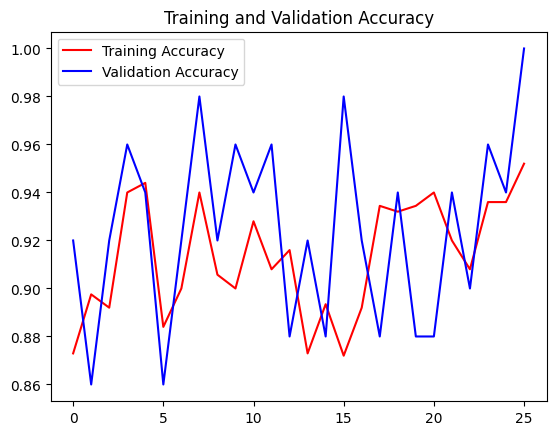

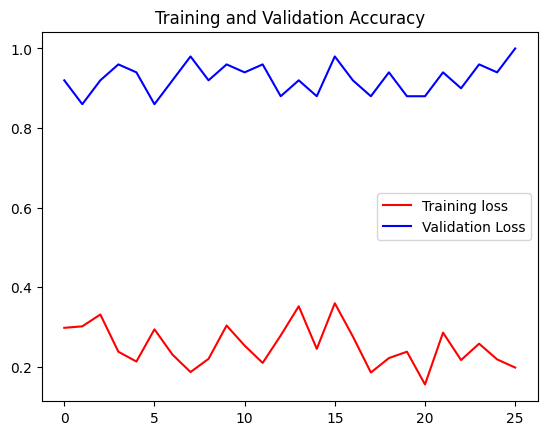

In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history ['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc= 'best')
plt.show()



**melakukan percobaan klasifikasi pada model yang telah dilatih**

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL (2).png
1/1 [==============================] - 0s 21ms/step
0ePX1wuCc3et7leL (2).png
scissors


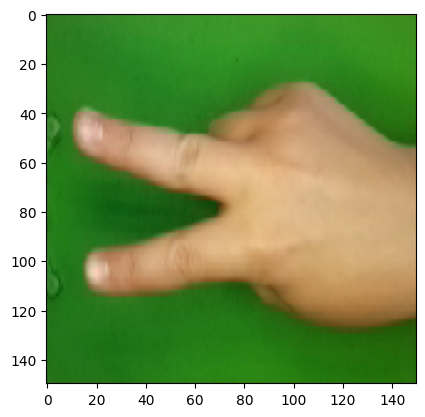

In [21]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
   print('paper')
  elif output_class==1:
   print('rock')
  else:
   print('scissors')